In [1]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fruits_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/fruits')
cat_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/cat')
dog_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/dog')
beach_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/beach')
bill_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/bill')
bookjacket_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/bookjacket')
car_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/car')
clothes_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/clothes')
drink_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/drink')
feast_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/feast')
field_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/field')
flower_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/flower')
food_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/food')
house_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/house')
jewels_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/jewels')
motorcycle_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/motorcycle')
mountain_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/mountain')
papers_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/papers')
person_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/person')
shoe_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/shoe')
truck_dir = os.path.join('/content/drive/MyDrive/CS114.M11/train_dataset/truck')

In [4]:
print('Total training fruits images:', len(os.listdir(fruits_dir)))
print('Total training cat images:', len(os.listdir(cat_dir)))
print('Total training dog images:', len(os.listdir(dog_dir)))
print('Total training beach images:', len(os.listdir(beach_dir)))
print('Total training bill images:', len(os.listdir(bill_dir)))
print('Total training bookjacket images:', len(os.listdir(bookjacket_dir)))
print('Total training car images:', len(os.listdir(car_dir)))
print('Total training clothes images:', len(os.listdir(clothes_dir)))
print('Total training drink images:', len(os.listdir(drink_dir)))
print('Total training feast images:', len(os.listdir(feast_dir)))
print('Total training field images:', len(os.listdir(field_dir)))
print('Total training flower images:', len(os.listdir(flower_dir)))
print('Total training food images:', len(os.listdir(food_dir)))
print('Total training house images:', len(os.listdir(house_dir)))
print('Total training jewels images:', len(os.listdir(jewels_dir)))
print('Total training motorcycle images:', len(os.listdir(motorcycle_dir)))
print('Total training mountain images:', len(os.listdir(mountain_dir)))
print('Total training papers images:', len(os.listdir(papers_dir)))
print('Total training person images:', len(os.listdir(person_dir)))
print('Total training shoe images:', len(os.listdir(shoe_dir)))
print('Total training truck images:', len(os.listdir(truck_dir)))

Total training fruits images: 157
Total training cat images: 316
Total training dog images: 293
Total training beach images: 287
Total training bill images: 108
Total training bookjacket images: 217
Total training car images: 114
Total training clothes images: 188
Total training drink images: 167
Total training feast images: 110
Total training field images: 126
Total training flower images: 276
Total training food images: 218
Total training house images: 111
Total training jewels images: 117
Total training motorcycle images: 211
Total training mountain images: 107
Total training papers images: 125
Total training person images: 184
Total training shoe images: 355
Total training truck images: 149


## data train


In [5]:
data_train=[]
labels_train=[]
random.seed(42)
imagePaths_train = sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/train_dataset/")))
random.shuffle(imagePaths_train)
print(imagePaths_train)


['shoe', 'clothes', 'jewels', 'cat', 'field', 'house', 'motorcycle', 'person', 'dog', 'fruits', 'papers', 'flower', 'bill', 'food', 'bookjacket', 'mountain', 'drink', 'feast', 'beach', 'car', 'truck']


In [6]:
for img in imagePaths_train:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/train_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/train_dataset/"+ img + '/' + i)
        image = cv2.resize(image, (224, 224))
        image = img_to_array(image)
        data_train.append(image)
        l = label = img
        labels_train.append(l)

In [7]:
data_train = np.array(data_train, dtype="float32") / 255.0
labels_train = np.array(labels_train)
mlb = LabelBinarizer()
labels_train = mlb.fit_transform(labels_train)

## data test

In [8]:
data_test=[]
labels_test=[]
random.seed(42)
imagePaths_test = sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/test_dataset/")))
random.shuffle(imagePaths_test)
print(imagePaths_test)

['shoe', 'clothes', 'jewels', 'cat', 'field', 'house', 'motorcycle', 'person', 'dog', 'fruits', 'papers', 'flower', 'bill', 'food', 'bookjacket', 'mountain', 'drink', 'feast', 'beach', 'car', 'truck']


In [9]:
for img in imagePaths_test:
    path=sorted(list(os.listdir("/content/drive/MyDrive/CS114.M11/test_dataset/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/CS114.M11/test_dataset/"+ img + '/' + i)
        image = cv2.resize(image, (224, 224))
        image = img_to_array(image)
        data_test.append(image)
        l = label = img
        labels_test.append(l)

In [10]:
data_test = np.array(data_test, dtype="float32") / 255.0
labels_test = np.array(labels_test)
mlb = LabelBinarizer()
labels_test = mlb.fit_transform(labels_test)

# model

In [11]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 


for layer in model_d.layers:
    layer.trainable = False

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(21,activation='softmax')(x) #FC-layer

In [12]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [13]:
adam = tensorflow.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
model.compile(optimizer = adam, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [14]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('denseNet121.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)


datagen.fit(data_train)
# Fits-the-model
history = model.fit_generator(datagen.flow(data_train, labels_train, batch_size=128),
               steps_per_epoch=data_train.shape[0] //224,
               epochs=50,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(data_train, labels_train))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50

Epoch 00001: val_loss improved from inf to 0.85330, saving model to denseNet121.h5
17/17 - 79s - loss: 1.5201 - accuracy: 0.6103 - val_loss: 0.8533 - val_accuracy: 0.7551 - lr: 0.0010 - 79s/epoch - 5s/step
Epoch 2/50

Epoch 00002: val_loss improved from 0.85330 to 0.46955, saving model to denseNet121.h5
17/17 - 54s - loss: 0.4652 - accuracy: 0.8681 - val_loss: 0.4696 - val_accuracy: 0.8521 - lr: 0.0010 - 54s/epoch - 3s/step
Epoch 3/50

Epoch 00003: val_loss improved from 0.46955 to 0.27282, saving model to denseNet121.h5
17/17 - 71s - loss: 0.3565 - accuracy: 0.8885 - val_loss: 0.2728 - val_accuracy: 0.9258 - lr: 0.0010 - 71s/epoch - 4s/step
Epoch 4/50

Epoch 00004: val_loss improved from 0.27282 to 0.21997, saving model to denseNet121.h5
17/17 - 69s - loss: 0.3175 - accuracy: 0.8989 - val_loss: 0.2200 - val_accuracy: 0.9352 - lr: 0.0010 - 69s/epoch - 4s/step
Epoch 5/50

Epoch 00005: val_loss improved from 0.21997 to 0.15940, saving model to denseNet121.h5
17/17 - 54s - los

In [15]:
ypred = model.predict(data_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(labels_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 600 	accurately-predicted-data: 551 	 wrongly-predicted-data:  49
Accuracy: 91.833 %


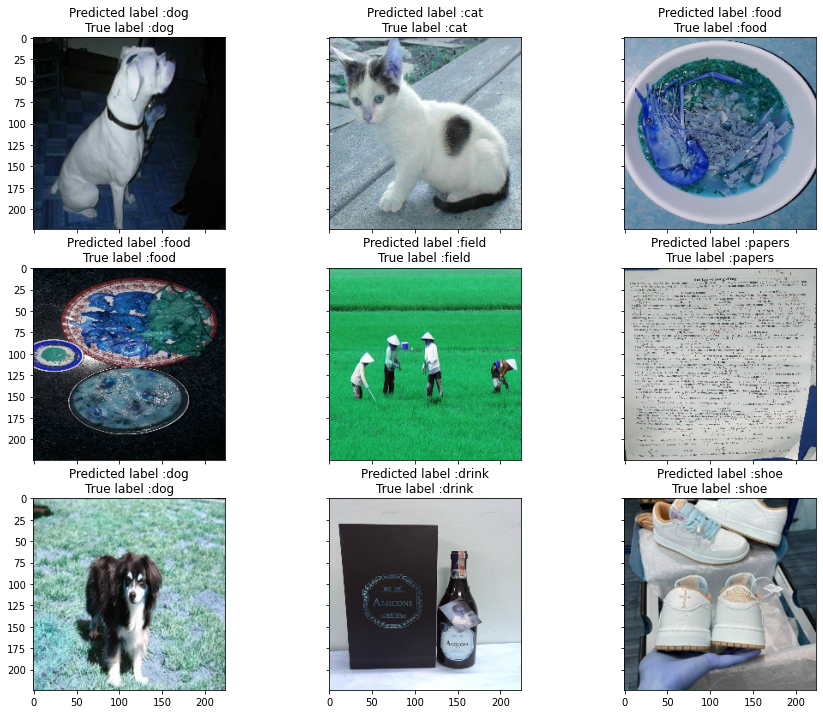

In [16]:
label=['beach', 'bill', 'bookjacket', 'car', 'cat', 'clothes', 'dog', 'drink','feast', 'field', 'flower', 'food', 'fruits', 'house', 'jewels', 'motorcycle', 'mountain', 'papers', 'person', 'shoe', 'truck']
imidx = random.sample(accurateindex, k=9)# replace with 'wrongindex'

nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

n = 0
for row in range(nrows):
    for col in range(ncols):
            ax[row,col].imshow(data_test[imidx[n]])
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(label[np.argmax(ypred[imidx[n]])], label[np.argmax(labels_test[imidx[n]])]))
            n += 1

plt.show()

Text(0.5, 228.47999999999993, 'Predicted')

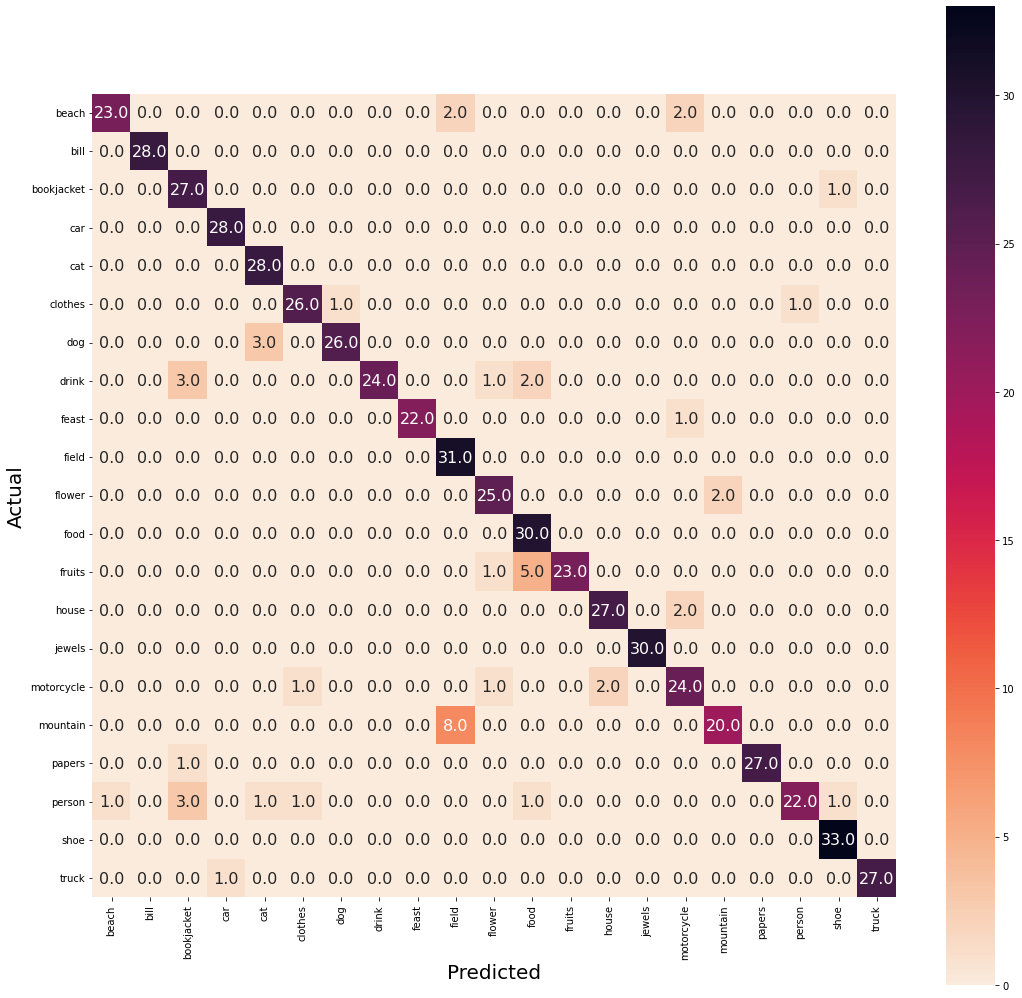

In [17]:
Ypred = model.predict(data_test)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(labels_test, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(18, 18))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [18]:
def demo_img(img_name):
    data_demo = []
    image = cv2.imread(img_name)
    image = cv2.resize(image, (224, 224))
    image = img_to_array(image)
    data_demo.append(image)
    data_demo = np.array(data_demo, dtype="float32") / 255.0
    ypred_demo = model.predict(data_demo)
    print("predict label: ",label[np.argmax(ypred_demo)])

In [19]:
# img_name = "/content/OIP (4).jpg"
# demo_img(img_name)
# plt.imshow(cv2.imread(img_name))